In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

derrom_path = "../"
data_path = "../../data/"

import sys
sys.path.append(derrom_path)

import derrom

In [2]:
trajectories = derrom.utils.load_trajectories(filename=data_path + 'trajectories_n_kmax=200.npz')
derivs = derrom.utils.load_trajectories(filename=data_path + 'derivs_n_kmax=200.npz')


ind = 10

trajectories = trajectories[::ind]
derivs = derivs[::ind]

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)


cutoff = int(n_trajectories*0.9)

train_trajectories = trajectories[:cutoff]
train_derivs = derivs[:cutoff]

test_trajectories = trajectories[cutoff:]
test_derivs = derivs[cutoff:]


100 loaded with n_kmax = 200


In [3]:
dim_reducer = derrom.dim_reducers.SVD()
scaler = derrom.scalers.standardize_scaler(1.0)
transformer = derrom.transformers.ELM_features(ELM_nodes=1000)
optimizer = derrom.optimizers.ridge(alpha=10.**-1)

model = derrom.estimator(rdim=15, DE_l=2, intercept=True, full_hist=False,
                    optimizer=optimizer,
                    scaler=scaler,
                    dim_reducer=dim_reducer,
                    NL_transformer=transformer)

model.fit(train_trajectories, train_derivs)

model.print_status()

full_hist:  False
intercept:  True
standardize:  True
rdim:  15
DE_l:  2
weights shape:  (1031, 200)


In [4]:
ind = 0

test_trajectory = test_trajectories[ind]
truth = test_derivs[ind]

pred = model.predict(test_trajectory)

print( model.get_error(test_trajectory,truth,pred,norm='rms') ) 
print( model.get_error(test_trajectory,truth,norm='rms') ) 
print( model.get_error(truth=truth, pred=pred, norm='max') ) 

0.00016109308711707298
0.00016109308711707298
0.0014231742373326224


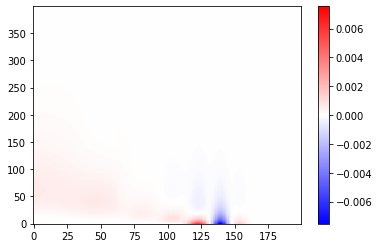

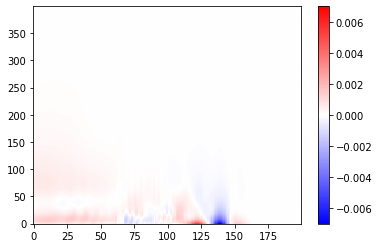

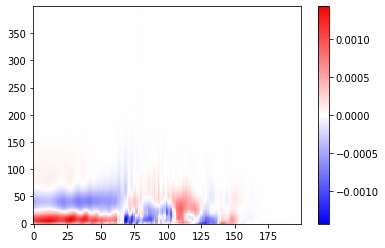

In [5]:
import matplotlib.colors as colors

plt.imshow(truth, aspect='auto', interpolation='none',origin='lower',cmap='bwr', norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()
plt.show()

plt.imshow(pred, aspect='auto', interpolation='none',origin='lower',cmap='bwr', norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()
plt.show()


plt.imshow(pred-truth, aspect='auto', interpolation='none',origin='lower',cmap='bwr', norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()
plt.show()


In [6]:
dim_reducer = derrom.dim_reducers.SVD()
scaler = derrom.scalers.standardize_scaler(1.0)
transformer = derrom.transformers.ELM_features(ELM_nodes=1000)
optimizer = derrom.optimizers.ridge(alpha=10.**-1)

model = derrom.estimator(rdim=15, DE_l=2, intercept=True, full_hist=False,
                    optimizer=optimizer,
                    scaler=scaler,
                    dim_reducer=dim_reducer,
                    NL_transformer=transformer)


scores = derrom.utils.get_KFold_CV_scores(model, trajectories, derivs, folds=10, seed=817,
                                          norms=['rms','max'],
                                          train_kwargs={})

print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )

rms error:  7.215401612026056e-05 +- 5.245658196797476e-05
max error:  0.0012337690425295788 +- 0.0009020170888509821


rms error:  7.215401612026056e-05 +- 5.245658196797476e-05
max error:  0.0012337690425295788 +- 0.0009020170888509821


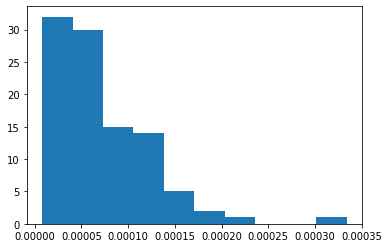

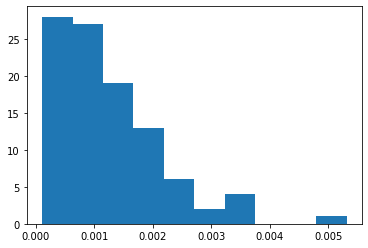

In [7]:
print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )

plt.hist(scores[0],bins=n_trajectories//10)
plt.show()

plt.hist(scores[1],bins=n_trajectories//10)
plt.show()